In [9]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Node class to store state, parent, action, and cost
class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state        # Position in the grid (row, col)
        self.parent = parent      # Parent node
        self.action = action      # Action taken to get here
        self.cost = cost          # Cost (g(n) for A*)
        self.priority = 0         # For priority queue (Greedy or A*)
    
    def __lt__(self, other):
        return self.priority < other.priority

In [11]:
# Maze class to manage the maze and search algorithms
class Maze:
    def __init__(self, maze_file):
        self.maze = self.read_maze(maze_file)
        self.start = None
        self.goal = None
        self.walls = set()
        self.rows = len(self.maze)
        self.cols = len(self.maze[0])
        
        # Locate start and goal positions
        self.locate_start_goal()

    def read_maze(self, maze_file):
        # Read the maze from the file and create a grid representation
        with open(maze_file, 'r') as file:
            return [list(line.strip()) for line in file]

    def locate_start_goal(self):
        # Find positions of A (start) and B (goal)
        for r in range(self.rows):
            for c in range(self.cols):
                if self.maze[r][c] == 'A':
                    self.start = (r, c)
                elif self.maze[r][c] == 'B':
                    self.goal = (r, c)
                elif self.maze[r][c] == '#':
                    self.walls.add((r, c))

    def get_neighbors(self, node):
        # Return valid neighbors (up, down, left, right)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        neighbors = []
        for dr, dc in directions:
            nr, nc = node.state[0] + dr, node.state[1] + dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols and self.maze[nr][nc] != '#':
                neighbors.append((nr, nc))
        return neighbors

    def heuristic(self, state):
        # Manhattan distance heuristic
        return abs(state[0] - self.goal[0]) + abs(state[1] - self.goal[1])

    def solve(self, algorithm="greedy"):
        # Search algorithm
        frontier = []
        explored = set()

        start_node = Node(self.start, cost=0)
        if algorithm == "greedy":
            start_node.priority = self.heuristic(self.start)  # Greedy: h(n)
        heapq.heappush(frontier, start_node)
        explored.add(self.start)

        while frontier:
            current_node = heapq.heappop(frontier)

            # Check if we reached the goal
            if current_node.state == self.goal:
                return self.reconstruct_path(current_node)

            # Explore neighbors
            for neighbor in self.get_neighbors(current_node):
                if neighbor not in explored:
                    new_cost = current_node.cost + 1
                    new_node = Node(neighbor, parent=current_node, cost=new_cost)
                    if algorithm == "greedy":
                        new_node.priority = self.heuristic(neighbor)  # Greedy: h(n)
                    elif algorithm == "astar":
                        new_node.priority = new_node.cost + self.heuristic(neighbor)  # A*: g(n) + h(n)

                    heapq.heappush(frontier, new_node)
                    explored.add(neighbor)

        raise ValueError("No path found")

    def reconstruct_path(self, node):
        path = []
        while node:
            path.append(node.state)
            node = node.parent
        return path[::-1]

    def display(self, path=None):
        # Visualize the maze with matplotlib
        maze_copy = np.array(self.maze)
        for (r, c) in self.walls:
            maze_copy[r, c] = '#'
        if path:
            for (r, c) in path:
                maze_copy[r, c] = '.'

        plt.imshow(maze_copy == '#', cmap='gray')
        plt.show()

Greedy Path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]


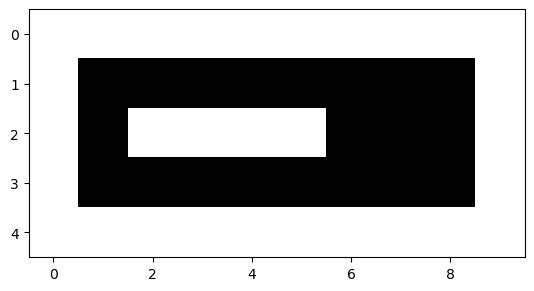

A* Path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]


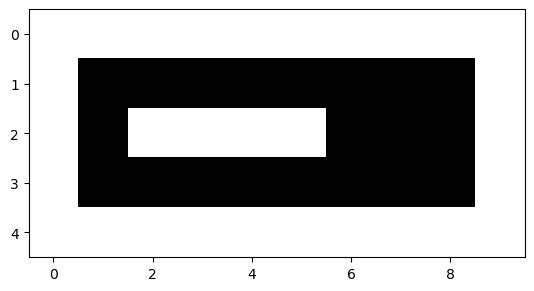

In [12]:
# Usage example
if __name__ == "__main__":
    maze_file = r"C:\Users\Nyasha\OneDrive - NUST\Desktop\Golden\Fifth Semester\Artificial Intell\Question 1. Informed Search\maze.txt"  # Example maze file path
    maze = Maze(maze_file)
    
    # Solve using Greedy Search
    path_greedy = maze.solve(algorithm="greedy")
    print("Greedy Path:", path_greedy)
    maze.display(path_greedy)

    # Solve using A* Search
    path_astar = maze.solve(algorithm="astar")
    print("A* Path:", path_astar)
    maze.display(path_astar)